In [22]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
import time

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
#plt.style.use('fivethirtyeight')  # for graph

In [23]:
ticker = str(input("Ticker symbol of company: ")) 
period1 = int(time.mktime(dt.datetime(2016, 12, 31, 23, 59).timetuple()))
period2 = int(time.mktime(dt.datetime(2021, 12, 31, 23, 59).timetuple()))
interval = '1d' # 1wk, 1m
historical_data = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

data = pd.read_csv(historical_data)
data.to_csv(f'{ticker}.csv')

Ticker symbol of company: TSLA


In [24]:
data.shape  # rows and columns

(1259, 7)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


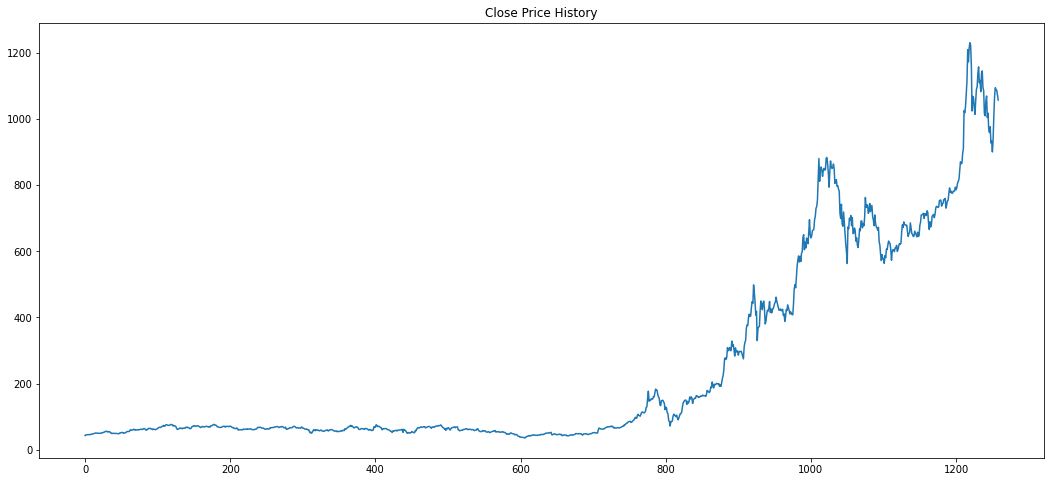

In [26]:
plt.figure(figsize=(18,8))
plt.title('Close Price History')
plt.plot(data['Close'])
plt.show()

In [27]:
close_data = data.filter(['Close'])
dataset = close_data.values
training_data_len = math.ceil(len(dataset) * .9)    # % 90 of the data set will be trained
training_data_len

1134

In [28]:
scaler = MinMaxScaler(feature_range=(0,1))          # 0-1 arası ölçekleme
scaled_data = scaler.fit_transform(dataset)

In [29]:
training_data = scaled_data[0:training_data_len]

x_train = []
y_train = []

for i in range(60,len(training_data)):
  x_train.append(training_data[i-60:i, 0])
  y_train.append(training_data[i,0])

In [30]:
len(training_data)  # train setinin uzunluğu (%90)

1134

In [31]:
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [32]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1))) # 50 units
model.add(LSTM(50, return_sequences=False))   # her noktaya 1 output var ise => return_sequences = False on the last LSTM
model.add(Dense(25))
model.add(Dense(1))

In [33]:
model.compile(optimizer='adam', loss='mean_squared_error')    #compile the model
model.fit(x_train, y_train, batch_size=64, epochs=25)         #train the model

Epoch 1/25
17/17 [==============================] - 5s 70ms/step - loss: 0.0060
Epoch 2/25
17/17 [==============================] - 1s 70ms/step - loss: 0.0010
Epoch 3/25
17/17 [==============================] - 1s 68ms/step - loss: 6.6285e-04
Epoch 4/25
17/17 [==============================] - 1s 67ms/step - loss: 5.7545e-04
Epoch 5/25
17/17 [==============================] - 1s 67ms/step - loss: 5.3439e-04
Epoch 6/25
17/17 [==============================] - 1s 66ms/step - loss: 5.0025e-04
Epoch 7/25
17/17 [==============================] - 1s 68ms/step - loss: 4.8658e-04
Epoch 8/25
17/17 [==============================] - 1s 72ms/step - loss: 4.4308e-04
Epoch 9/25
17/17 [==============================] - 1s 69ms/step - loss: 4.4066e-04
Epoch 10/25
17/17 [==============================] - 1s 68ms/step - loss: 3.8204e-04
Epoch 11/25
17/17 [==============================] - 1s 69ms/step - loss: 3.5569e-04
Epoch 12/25
17/17 [==============================] - 1s 68ms/step - loss: 3.5028e-

In [34]:
#create train dataset
data_test = scaled_data[training_data_len - 60:, :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60,len(data_test)):
  x_test.append(data_test[i-60:i, 0])
x_test = np.array(x_test)

In [35]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [36]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
print(len(predictions))
print(predictions)

125
[[ 667.62286]
 [ 664.08484]
 [ 659.50085]
 [ 655.0007 ]
 [ 653.89233]
 [ 652.9051 ]
 [ 650.6253 ]
 [ 647.5827 ]
 [ 643.70795]
 [ 639.9515 ]
 [ 638.0997 ]
 [ 636.9571 ]
 [ 635.8048 ]
 [ 634.2228 ]
 [ 634.07776]
 [ 633.41455]
 [ 632.8602 ]
 [ 635.5818 ]
 [ 640.87476]
 [ 649.5505 ]
 [ 659.3388 ]
 [ 669.01465]
 [ 678.06464]
 [ 684.1576 ]
 [ 689.4765 ]
 [ 693.2144 ]
 [ 695.35297]
 [ 697.7735 ]
 [ 699.3875 ]
 [ 697.03174]
 [ 690.5102 ]
 [ 684.6347 ]
 [ 677.8254 ]
 [ 671.92694]
 [ 669.81696]
 [ 670.2467 ]
 [ 672.48737]
 [ 674.5692 ]
 [ 677.5998 ]
 [ 682.85406]
 [ 689.33514]
 [ 695.7462 ]
 [ 701.3276 ]
 [ 705.9832 ]
 [ 711.6448 ]
 [ 717.26434]
 [ 722.36804]
 [ 724.5991 ]
 [ 725.68036]
 [ 725.974  ]
 [ 726.8931 ]
 [ 728.06134]
 [ 729.4712 ]
 [ 727.66455]
 [ 725.28595]
 [ 723.9983 ]
 [ 723.53674]
 [ 725.8211 ]
 [ 731.1834 ]
 [ 736.2542 ]
 [ 741.17816]
 [ 744.8358 ]
 [ 747.3567 ]
 [ 749.57996]
 [ 751.19586]
 [ 752.48254]
 [ 754.553  ]
 [ 755.8657 ]
 [ 757.3273 ]
 [ 760.12506]
 [ 763.871  ]
 [

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


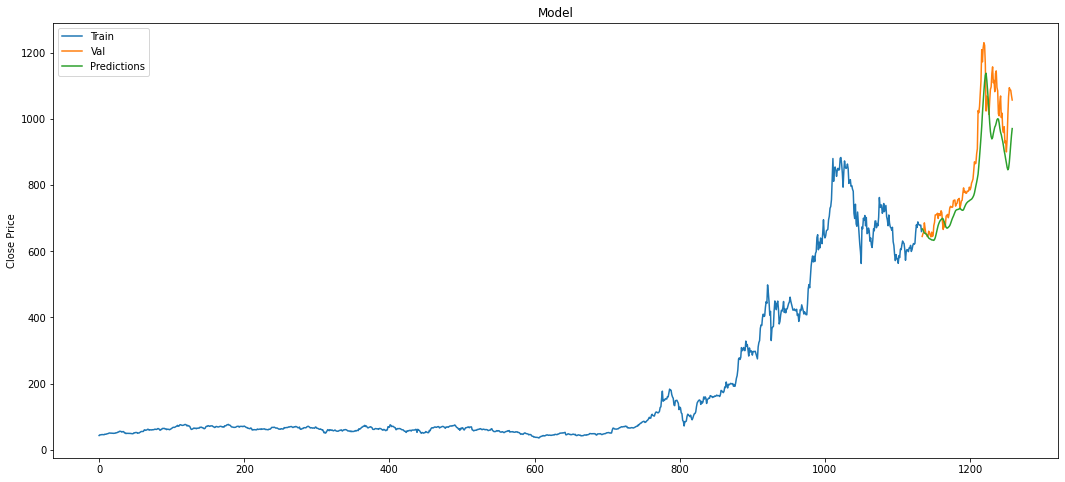

In [37]:
train = data[:training_data_len]    # 0 - 0.9
valid = data[training_data_len:]    # 0.9 - 1
valid['predictions'] = predictions
plt.figure(figsize=(18,8))
plt.title('Model')

plt.ylabel('Close Price')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()  

In [38]:
valid['predictions']  # tahmin edilen değerler

1134    667.622864
1135    664.084839
1136    659.500854
1137    655.000671
1138    653.892334
           ...    
1254    868.066345
1255    894.329529
1256    922.640259
1257    949.302368
1258    970.454163
Name: predictions, Length: 125, dtype: float32

In [39]:
valid['Close']      # gerçek değerler

1134     644.650024
1135     652.809998
1136     656.950012
1137     685.700012
1138     668.539978
           ...     
1254    1093.939941
1255    1088.469971
1256    1086.189941
1257    1070.339966
1258    1056.780029
Name: Close, Length: 125, dtype: float64

In [40]:
score = abs(valid['Close'] - valid['predictions'])
score = score / valid['Close'] * 100
print('Success rate: %',100 - sum(score)/len(valid))

Success rate: % 93.27918878587805
